# Written by Federica B. Bianco @fedhere
# for NYU CUSP PUI
# This is my example of Assignment 2, Phase 1 and 2.
# For Assignment 2 you should design your own investigation into the citibike data.
- # Come up with a question about the Citibike data usage. It can be anything that involves Categorical data. 
    # At this point of the class it is easier to run tests of proportions or similar, and work with categorical data. Categorical cn be anhything that can be punt into classes (e.g. day/night, male/female, 2014/2015/2016.... as long as you set up your experiment the proper way!)
- # Choose the significance threshold
- # Clearly state they Null and Alternate hypothesis
- # Wrangle the data so that it is ready for your analysis.

In [13]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

import os
import csv
df = pd.read_csv('/gws/open/Student/citibike/201707-citibike-tripdata.csv.zip')
# pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


In [14]:
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


# IDEA:
## Women are less likely than men to ride less duration of biking

# NULL HYPOTHESIS:
## The frequency of women's duration biking time  is _the same_ or _higher_  than the ratio of men's duration of biking biking time.

# _$H_0$_ : $\frac{W_{\mathrm{weekend}}}{W_{\mathrm{week}}} <= \frac{M_{\mathrm{weekend}}}{M_{\mathrm{week}}}$
# _$H_1$_ : $\frac{W_{\mathrm{weekend}}}{W_{\mathrm{week}}} > \frac{M_{\mathrm{weekend}}}{M_{\mathrm{week}}}$

or identically:

# _$H_0$_ : $\frac{W_{\mathrm{weekend}}}{W_{\mathrm{week}}} - \frac{M_{\mathrm{weekend}}}{M_{\mathrm{week}}} <= 0 $
# _$H_1$_ : $\frac{W_{\mathrm{weekend}}}{W_{\mathrm{week}}} - \frac{M_{\mathrm{weekend}}}{M_{\mathrm{week}}} > 0$
## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

## I am starting with a single month of data:  reading data from citibike csv file from Jan 2015

what I want is the date and time of the beginning of each trip. pandas has an easy method to read csv files, and an easy method to convert strinds to dates.

if i read a csv file with pandas the content is stored in a "DataFrame". You can think of it as a python dictionary in many ways,but it has many added capabilities: it is easy to convert variables within it, it knows how to plot itself, etc.

### download and move  data to PUIDATA
# NOTE: 
# 1. access to data from within the notebook _is required_
# 2. if data is downloaded it _must_ be stored in a directory pointed to by the environmental variable PUIDATA

In [15]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [16]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype','birth year'], axis=1, inplace=True)

In [17]:
df.head()

,tripduration,gender
0,364,1
1,2142,1
2,328,2
3,2530,1
4,2534,2


In [18]:
df.quantile(.95)

tripduration    2184.0
gender             2.0
dtype: float64

### Lets separate males (_m) from females (_w) to test the hypotheses.
### In this csv file gender == 1 is male, gender == 2 is female

### Lets plot the number of trips per week day

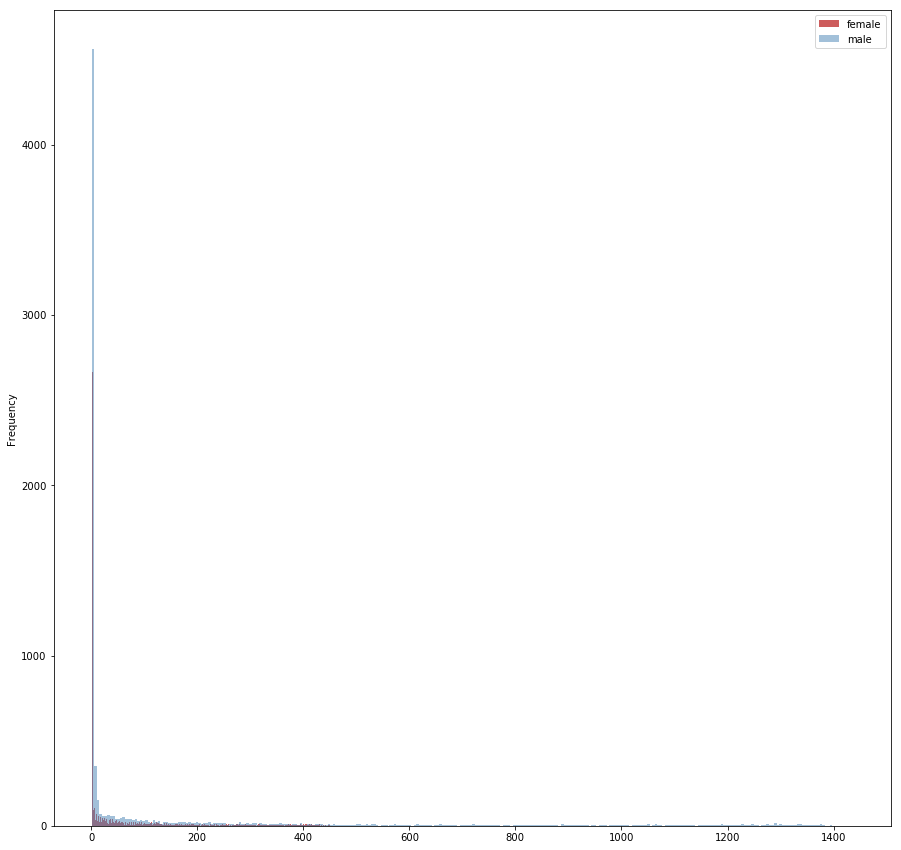

In [20]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas


((df['tripduration'][df['gender'] == 2].groupby([df['tripduration']]).count().plot(bins=300,kind="hist",color='IndianRed',label='female')))

((df['tripduration'][df['gender'] == 1].groupby([df['tripduration']]).count().plot(bins=300,kind="hist",color='SteelBlue',alpha=0.5, label='male')))
pl.legend()

## Figure 1a: Distribution of Citibike bikers by gender in January 2015, absolute counts

### Note: the counts have errors of course. what is the error on the count statistics? 
### for N counts the error is sqrt(N) - this is because counts follow a Poisson statistic

In [7]:
fig=pl.figure(figsize(15,10))

counts_w = df.date[df.gender == 2].groupby([df.date.dt.weekday]).count()
norm_w = 1
error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


counts_m = df.date[df.gender==1].groupby([df.date.dt.weekday]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='SteelBlue', label='men bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['women bikers','men bikers'],fontsize=20)


AttributeError: 'DataFrame' object has no attribute 'date'

## Figure 1b: Distribution of Citibike bikers by gender in January 2015, absolute counts, with statistical errors

Note: These are absolute numbers. It is very hard to compare absolute numbers. Ratios (or proportions) are more ameable to comparison, so let's _normalize_ the distribution of man, and that of women, i.e. devide them by the total number of rides for that gender. 
(Notice that i have to normalize the errorbars too!)



In [ ]:
fig = pl.figure(figsize(15,10))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='women bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='SteelBlue', label='men bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(['women bikers','men bikers'],fontsize=20)


## Figure 2: Distribution of Citibike bikers by gender in January 2015, normalized

we can add up the week and weekend days, then this becomes a test of proportions, (like the one seen in the [employment notebook](https://github.com/fedhere/UInotebooks/blob/master/hypothesistesting/effectivenes%20of%20NYC%20Post-Prison%20Employment%20Programs.save.ipynb))

__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
# This is the portion of Assignment 2 that should be done by the week of September 26.  The rest will be due the following week.
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________


## Set up the test of proportions
### I need the fraction of women that bikes during the weekdays and the fraction that bikes during weekends, and the same for men

In [ ]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

week_w = sum(counts_w[:-2]) * 1.0 / norm_w  #fraction of women riding on week days
weekend_w = sum(counts_w[-2:]) * 1.0 / norm_w  #fraction of women riding on weekends
eweek_w = np.sqrt(sum(error_w[:-2]**2)) / norm_w  #error on fraction number of women riding on week days
eweekend_w = np.sqrt(sum(error_w[-2:]**2)) / norm_w #error on fraction number of women riding on weekends

#same nomenclature as above
week_m = sum(counts_m[:-2]) * 1.0 / norm_m
weekend_m = sum(counts_m[-2:]) * 1.0 / norm_m
eweek_m = np.sqrt(sum(error_m[:-2]**2)) / norm_m
eweekend_m = np.sqrt(sum(error_m[-2:]**2)) / norm_m

print("Men: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_m, weekend_m, eweek_m, eweekend_m))
print("Women: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_w, weekend_w, eweek_w, eweekend_w))

ax1.errorbar([0.4], [week_m], yerr=[eweek_m], fmt='o', label='men')
ax1.errorbar([0.2], [week_w], yerr=[eweek_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_m], yerr=[eweekend_m], fmt='o', label='men')
ax2.errorbar([0.2], [weekend_w], yerr=[eweekend_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by gender")
ax1.set_ylabel("Fraction of normalized rides by gender")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

## Figure 3: Fraction of Citibike bikers per gender in January 2016 for week days (left) and weekends (right)

### Is the percentage of women that ride on weekends lower or equal to that of man?
## The statistics is: 
# $z = \frac{(p_0 - p_1)}{SE} $
# $p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$
# $SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$
## and in this notation 
# $p_0 = \frac{W_{\mathrm{weekend}}}{W_{\mathrm{week}}}$
### and 
# $p_1 = \frac{M_{\mathrm{weekend}}}{M_{\mathrm{week}}}$


In [ ]:
P0mP1 = weekend_w - weekend_m
print ("difference between man and women on weekend: ", P0mP1)
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

### Is this difference statistically significant?

In [ ]:
# defining the functions that calculate the statistics
# the lambda style definition is NOT APPROVED BY PEP8 and you should avoind it
# but I am putting it here since you may encounter it in your coding life.
# confront the equation in the markdown cell above with these function to understand as they work

p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_mw = se(p(weekend_w, weekend_m, norm_w, norm_m), norm_w, norm_m)
# print (sp_stdev_mw)
z = zscore(weekend_w, weekend_m, sp_stdev_mw)
print ("The z statistics is %.2f"%z) 

## The largest number reported in  z stats tables is (thpically) 3, which gives  a p value
## $p <0.0002$, which is smaller then my chosen $\alpha=0.05$ - so yes, it is statistically significant (by a lot!)

# We reject the Null Hypothesis that man are more likely to commute than women $p< 0.05$


__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________

# Check the robustness of your answer with another citibike dataset (unless you used all of the data at once!)

## Lets see if our test holds in the summer, when people clothes may get less in the way to riding

### notice that it is not very pythonic to just copy and paste code as I am doing here! Everything that needs to be done more than once should be done in a function. Why? Because that way if I make any changes I do not run the risk to forget to make the change in one of the spots! (Also it helps readability)

In [ ]:
datestring = '201506'
getCitiBikeCSV(datestring)

In [ ]:
df_06 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df_06['date'] = pd.to_datetime(df_06.starttime)
df_06.head()

In [ ]:
df_06.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)


In [ ]:
df_06.head()

In [ ]:
fig=pl.figure(figsize(15,10))

counts_w06 = df_06.date[df_06.gender == 2].groupby([df_06.date.dt.weekday]).count()
norm_w06 = counts_w06.sum()
error_w06 = np.sqrt(counts_w06)

((counts_w06) / norm_w06).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w06) / norm_w06, (error_w06) / norm_w06)], label='women bikers, June')

counts_m06 = df_06.date[df_06.gender==1].groupby([df_06.date.dt.weekday]).count()
norm_m06 = counts_m06.sum()
error_m06 = np.sqrt(counts_m06)
ax=((counts_m06) / norm_m06).plot(kind="bar", alpha=0.5, 
                                  yerr=[((error_m06) / norm_m06, (error_m06) / norm_m06)], 
                                  color="SteelBlue", label='men bikers, June')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")


pl.legend(['women bikers','men bikers'],fontsize=20)

## Figure 4: Distribution of Citibike bikers by gender in June 2016, normalized

In [ ]:
fig=pl.figure(figsize(15,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

week_w06 = sum(counts_w06[:-2]) * 1.0 / norm_w06
weekend_w06 = sum(counts_w06[-2:])*1.0 / norm_w06
eweek_w06 = np.sqrt(sum(error_w06[:-2]**2)) / norm_w06
eweekend_w06 = np.sqrt(sum(error_w06[-2:]**2)) / norm_w06

week_m06 = sum(counts_m06[:-2]) * 1.0 / norm_m06
weekend_m06 = sum(counts_m06[-2:]) * 1.0 / norm_m06
eweek_m06 = np.sqrt(sum(error_m06[:-2]**2)) / norm_m06
eweekend_m06 = np.sqrt(sum(error_m06[-2:]**2)) / norm_m06

print("Men: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_m06, weekend_m06, eweek_m06, eweekend_m06))
print("Women: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_w06, weekend_w06, eweek_w06, eweekend_w06))

ax1.errorbar([0.2],[week_w06], yerr=[eweek_w06], fmt='o', label='women')
ax1.errorbar([0.4],[week_m06], yerr=[eweek_m06], fmt='o', label='men')
ax1.set_xlim(0,0.5)
ax2.errorbar([0.2],[weekend_w06], yerr=[eweekend_w06], fmt='o', label='women')
ax2.errorbar([0.4],[weekend_m06], yerr=[eweekend_m06], fmt='o', label='men')
ax1.set_xlim(0,0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by gender")
ax1.set_ylabel("Fraction of normalized rides by gender")

pl.xlim(-0.5,1.5)
pl.legend(fontsize=20)


sp_stdev_mw06 = se(p(weekend_w06, weekend_m06, norm_w06, norm_m06), norm_w06, norm_m06)
# print (sp_stdev_mw)
z06 = zscore(weekend_w06, weekend_m06, sp_stdev_mw06)
print ("The z statistics is %.2f"%z) 

## The z statstic is even larger in the Summer! Larger z means farther into the significance reagion
# We reject the Null Hypothesis that man are more likely to commute than women $p< 0.05$ in the summer aswell, 
# and my hypothesis is robust to seasonality


# BUT inreality ... there are many moreriders in the summer, 
# so the increase in statistical significance may not be due to a larger effect, but not to a larger effect.
# Let's check the _effect size_: 
# there are 2 formulae I find in the literature
# $r = \frac{z}{\sqrt{(n_0+n_1)}}$
# and
# $h =  2 (\arcsin \sqrt{p_0} -  \arcsin \sqrt{p_1} )$. https://en.wikipedia.org/wiki/Cohen%27s_h

In [ ]:
r = lambda z, n0, n1 : z / np.sqrt(n0+n0)
h = lambda p0, p1: 2 * (np.arcsin(np.sqrt(p0)) - np.arcsin(np.sqrt(p1)))

In [ ]:
r01 = r(z, norm_w, norm_m)
r06 = r(z06, norm_w06, norm_m06)
print (r01, r06)

In [ ]:
h01 = h(weekend_w, weekend_m)
h06 = h(weekend_w06, weekend_m06)
print (h01, h06)

# In all these cases we have SMALL EFFECT SIZE, and in both cases slightly smaller for the summer data (although the statistiocal significance is slightly higher)